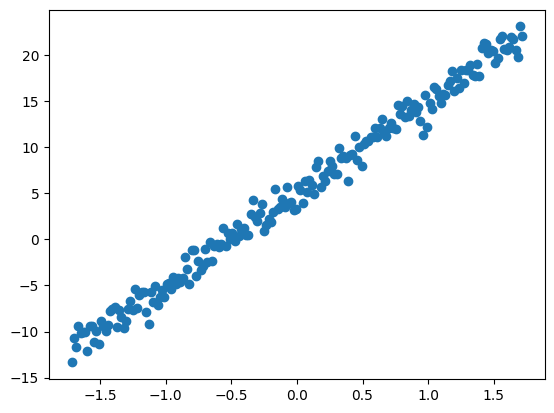

In [1]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1024)

x = torch.linspace(100,300,200)

x = (x - torch.mean(x)) / torch.std(x)

epsilon = torch.randn(x.shape)
y = x*10 + 5 + epsilon

plt.scatter(x,y)

In [2]:
from sklearn import linear_model

m = linear_model.LinearRegression()

m.fit(x.view(-1,1),y)
m.coef_, m.intercept_

(array([9.934817], dtype=float32), 5.093296)

In [4]:
import torch.nn as nn

class Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.zeros(()))
        self.b = nn.Parameter(torch.zeros(()))
    def forward(self,x):
        
        return self.a * x + self.b
    
    def string(self):
        return f'y = {self.a.item()}x + {self.b.item()}'
    

In [5]:
m = Linear()
m(x)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<AddBackward0>)

In [6]:
import torch.optim as optim

learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    y_pred = model(x)
    #定义损失
    loss = (y - y_pred).pow(2).mean()
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #更新模型参数
    optimizer.step()
    print(model.string())

y = 1.9770288467407227x + 1.018659234046936
y = 3.560628890991211x + 1.8335866928100586
y = 4.829092979431152x + 2.4855284690856934
y = 5.845132350921631x + 3.007081985473633
y = 6.658979892730713x + 3.4243247509002686
y = 7.3108720779418945x + 3.7581191062927246
y = 7.833037376403809x + 4.0251545906066895
y = 8.25129222869873x + 4.23878288269043
y = 8.58631420135498x + 4.4096856117248535
y = 8.854666709899902x + 4.546407699584961
y = 9.06961727142334x + 4.65578556060791
y = 9.241792678833008x + 4.743287563323975
y = 9.379704475402832x + 4.813289165496826
y = 9.490172386169434x + 4.869290351867676
y = 9.578657150268555x + 4.91409158706665
y = 9.64953327178955x + 4.94993257522583
y = 9.706305503845215x + 4.978605270385742
y = 9.751779556274414x + 5.0015435218811035
y = 9.788204193115234x + 5.019894123077393
y = 9.817380905151367x + 5.034574508666992


In [7]:
learning_rate = 0.1
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    y_pred = model(x)
    #定义损失
    loss = (y - y_pred).pow(2).mean()
    # optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #更新模型参数
    # optimizer.step()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            param.grad = None
    print(model.string())

y = 1.9770288467407227x + 1.018659234046936
y = 3.560628890991211x + 1.8335866928100586
y = 4.829092979431152x + 2.4855284690856934
y = 5.845132350921631x + 3.007081985473633
y = 6.658979892730713x + 3.4243247509002686
y = 7.3108720779418945x + 3.7581191062927246
y = 7.833037376403809x + 4.0251545906066895
y = 8.25129222869873x + 4.23878288269043
y = 8.58631420135498x + 4.4096856117248535
y = 8.854666709899902x + 4.546407699584961
y = 9.06961727142334x + 4.65578556060791
y = 9.241792678833008x + 4.743287563323975
y = 9.379704475402832x + 4.813289165496826
y = 9.490172386169434x + 4.869290351867676
y = 9.578657150268555x + 4.91409158706665
y = 9.64953327178955x + 4.94993257522583
y = 9.706305503845215x + 4.978605270385742
y = 9.751779556274414x + 5.0015435218811035
y = 9.788204193115234x + 5.019894123077393
y = 9.817380905151367x + 5.034574508666992


In [8]:
#### 随机梯度下降法
learning_rate = 0.1
batch_size = 20
model = Linear()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for t in range(20):
    ix = (t * batch_size) % len(x)
    xx = x [ix: ix + batch_size]
    yy = y [ix: ix + batch_size]
    
    yy_pred = model(xx)
    #定义损失
    loss = (yy - yy_pred).pow(2).mean()
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #更新模型参数
    optimizer.step()
    print(model.string())

y = 3.1156928539276123x + -1.9899853467941284
y = 3.475987195968628x + -2.2801311016082764
y = 3.223376989364624x + -1.9691072702407837
y = 2.848735809326172x + -1.222139596939087
y = 2.6815104484558105x + -0.2283461093902588
y = 2.9244801998138428x + 1.0825458765029907
y = 3.7370963096618652x + 2.6131222248077393
y = 5.067680835723877x + 4.153487205505371
y = 6.727190017700195x + 5.5186285972595215
y = 8.217803955078125x + 6.478368282318115
y = 9.357925415039062x + 5.748385906219482
y = 9.751523971557617x + 5.420456886291504
y = 9.880268096923828x + 5.27561092376709
y = 9.885746955871582x + 5.263716220855713
y = 9.88665771484375x + 5.203500747680664
y = 9.884613037109375x + 5.179051399230957
y = 9.884774208068848x + 5.16880989074707
y = 9.844035148620605x + 5.135880470275879
y = 9.859176635742188x + 5.149223804473877
y = 9.943882942199707x + 5.20881986618042


In [15]:
learning_rate = 0.1
model = Linear()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#动量考虑
#梯度归一化
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
for t in range(500):
    y_pred = model(x)
    #定义损失
    loss = (y - y_pred).pow(2).mean()
    optimizer.zero_grad()
    #计算梯度
    loss.backward()
    #更新模型参数
    optimizer.step()
    print(model.string())

y = 0.10000000149011612x + 0.09999999403953552
y = 0.19987235963344574x + 0.1998434066772461
y = 0.29959848523139954x + 0.299491286277771
y = 0.39915966987609863x + 0.3989037871360779
y = 0.4985371232032776x + 0.49804025888442993
y = 0.597711980342865x + 0.596859335899353
y = 0.6966654062271118x + 0.6953189373016357
y = 0.795378565788269x + 0.7933766841888428
y = 0.893832802772522x + 0.8909894824028015
y = 0.9920094609260559x + 0.9881139397621155
y = 1.0898901224136353x + 1.084706425666809
y = 1.1874566078186035x + 1.1807233095169067
y = 1.2846908569335938x + 1.276120901107788
y = 1.3815752267837524x + 1.3708552122116089
y = 1.4780924320220947x + 1.4648829698562622
y = 1.5742251873016357x + 1.558160662651062
y = 1.669956922531128x + 1.65064537525177
y = 1.7652713060379028x + 1.7422947883605957
y = 1.8601523637771606x + 1.8330668210983276
y = 1.9545847177505493x + 1.9229202270507812
y = 2.048553228378296x + 2.011814594268799
y = 2.1420435905456543x + 2.099709987640381
y = 2.235041379928

In [17]:
####张量

torch.zeros(20,2)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

In [24]:
a = torch.randn(2,4,7)
a.view(a.shape)

tensor([[[-7.3467e-04, -3.1002e-01,  2.0686e+00, -1.4659e+00, -3.2999e-01,
          -3.8613e-02, -1.4233e-01],
         [-1.2332e-01,  1.0768e-01,  1.1075e+00,  1.9895e+00,  1.8946e+00,
          -1.1043e+00,  6.4937e-01],
         [-3.3221e-01, -9.7848e-01,  6.6422e-01,  8.4423e-01, -9.0072e-01,
          -5.1883e-01, -1.2689e+00],
         [ 2.0721e-01,  9.0879e-01,  1.5750e+00, -7.7281e-01, -2.0157e+00,
           1.8867e+00,  5.1021e-01]],

        [[-7.3792e-01,  9.5367e-01, -1.5467e+00, -6.5765e-01, -6.8708e-01,
          -4.5450e-01,  1.5622e+00],
         [-2.9227e-03,  5.2181e-02, -6.0275e-01,  1.2620e+00, -6.5467e-01,
          -2.8665e-01, -1.8614e+00],
         [-2.5142e-01,  4.3964e-01, -4.0394e-01, -1.0575e+00,  6.5684e-01,
          -9.7542e-01, -1.4332e+00],
         [ 1.9827e+00, -2.9537e-01, -1.9706e+00,  7.5894e-01,  1.2582e+00,
          -7.0912e-01,  1.3626e+00]]])

In [25]:
data = torch.randn(2,5)
data

tensor([[ 0.1815,  1.4637,  0.5845, -0.2434,  0.4529],
        [ 0.8718,  0.1894, -1.3807,  1.4824,  2.5060]])

In [27]:
data.view(5,2).shape
data

tensor([[ 0.1815,  1.4637,  0.5845, -0.2434,  0.4529],
        [ 0.8718,  0.1894, -1.3807,  1.4824,  2.5060]])